# Abundances

`synthesizer` can be used to generate abundance patterns, in total and for gas and dust individually, for a given metallicity, alpha ehancement, and arbitrary element scalings.

At present this functionality is only utilised when creating cloudy input scripts. These scripts are used to calculate nebular line and continuum emission for a given incident spectral energy distribution and gas abundance pattern.

In [1]:
from synthesizer.abundances import (
    Abundances,
    ScalingFunctions,
    SolarAbundances,
    DepletionPatterns,
    plot_abundance_pattern,
    plot_multiple_abundance_patterns,
)

by default initialising `Abundances` creates a solar abundance pattern with no depletion. The default solar abundance pattern is Asplund et al. (2009), though this can be changed if desired. 

In [2]:
a1 = Abundances()

like most `synthesizer` objects we can explore the important attributes of an object by using `print()`:

In [3]:
print(a1)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.714
Y: 0.272
Z: 0.013
Z/Z_sol: 1
alpha: 0.000
dust-to-metal ratio: None
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -10.94 (1.06) [0.01] 
Beryllium: -10.61 (1.39) [0.01] 
Boron: -9.29 (2.71) [0.01] 
Carbon: -3.56 (8.44) [0.01] 
Nitrogen: -4.16 (7.84) [0.01] 
Oxygen: -3.30 (8.70) [0.01] 
Fluorine: -7.43 (4.57) [0.01] 
Neon: -4.06 (7.94) [0.01] 
Sodium: -5.06 (6.94) [0.01] 
Magnesium: -4.39 (7.61) [0.01] 
Aluminium: -5.54 (6.46) [0.01] 
Silicon: -4.48 (7.52) [0.01] 
Phosphorus: -6.58 (5.42) [0.01] 
Sulphur: -4.87 (7.13) [0.01] 
Chlorine: -6.49 (5.51) [0.01] 
Argon: -5.59 (6.41) [0.01] 
Potassium: -6.96 (5.04) [0.01] 
Calcium: -5.65 (6.35) [0.01] 
Scandium: -8.84 (3.16) [0.01] 
Titanium: -7.04 (4.96) [0.01] 
Vanadium: -8.06 (3.94) [0.01] 
Chromium: -6.35 (5.65) [0.01] 
Manganese: -6.56 (5.44) [0.01] 
Iron: -4.49 (7.51) [0.01] 
Cobalt: -7.00 (5.00) [0.01] 
Nickel: -5.77 

You can access the logarithmic abundances ($\log_{10}(N_X/N_H)$) of an element like this:

In [4]:
print(f"log10(O/H): {a1.total['O']:.2f}")
print(f"log10(O/H): {a1['O']:.2f}")

log10(O/H): -3.30
log10(O/H): -3.30


We can specify a different metallicity. By default abundances are scaled from the Solar abundances provided through an optional argument (default Asplund et a. 2009). However, as we will see later, it is possible to set a different $\alpha$-enhancement or set arbitrary element scalings.

In [5]:
a2 = Abundances(metallicity=0.01)
print(a2)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.724
Y: 0.266
Z: 0.010
Z/Z_sol: 0.75
alpha: 0.000
dust-to-metal ratio: None
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -11.07 (0.93) [-0.12] 
Beryllium: -10.74 (1.26) [-0.12] 
Boron: -9.42 (2.58) [-0.12] 
Carbon: -3.69 (8.31) [-0.12] 
Nitrogen: -4.29 (7.71) [-0.12] 
Oxygen: -3.43 (8.57) [-0.12] 
Fluorine: -7.56 (4.44) [-0.12] 
Neon: -4.19 (7.81) [-0.12] 
Sodium: -5.19 (6.81) [-0.12] 
Magnesium: -4.52 (7.48) [-0.12] 
Aluminium: -5.67 (6.33) [-0.12] 
Silicon: -4.61 (7.39) [-0.12] 
Phosphorus: -6.71 (5.29) [-0.12] 
Sulphur: -5.00 (7.00) [-0.12] 
Chlorine: -6.62 (5.38) [-0.12] 
Argon: -5.72 (6.28) [-0.12] 
Potassium: -7.09 (4.91) [-0.12] 
Calcium: -5.78 (6.22) [-0.12] 
Scandium: -8.97 (3.03) [-0.12] 
Titanium: -7.17 (4.83) [-0.12] 
Vanadium: -8.19 (3.81) [-0.12] 
Chromium: -6.48 (5.52) [-0.12] 
Manganese: -6.69 (5.31) [-0.12] 
Iron: -4.62 (7.38) [-0.12] 
Cobalt: -7.13 (4

## $\alpha$-enhancement

We can also generate abundance patterns assuming different $\alpha$-enhancements.

In [6]:
a3 = Abundances(metallicity=0.01, alpha=0.6)
print(a3)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.724
Y: 0.266
Z: 0.010
Z/Z_sol: 0.75
alpha: 0.600
dust-to-metal ratio: None
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -11.54 (0.46) [-0.59] 
Beryllium: -11.21 (0.79) [-0.59] 
Boron: -9.89 (2.11) [-0.59] 
Carbon: -4.16 (7.84) [-0.59] 
Nitrogen: -4.76 (7.24) [-0.59] 
Oxygen: -3.30 (8.70) [0.01] 
Fluorine: -8.03 (3.97) [-0.59] 
Neon: -4.06 (7.94) [0.01] 
Sodium: -5.66 (6.34) [-0.59] 
Magnesium: -4.39 (7.61) [0.01] 
Aluminium: -6.14 (5.86) [-0.59] 
Silicon: -4.48 (7.52) [0.01] 
Phosphorus: -7.18 (4.82) [-0.59] 
Sulphur: -4.87 (7.13) [0.01] 
Chlorine: -7.09 (4.91) [-0.59] 
Argon: -5.59 (6.41) [0.01] 
Potassium: -7.56 (4.44) [-0.59] 
Calcium: -5.65 (6.35) [0.01] 
Scandium: -9.44 (2.56) [-0.59] 
Titanium: -7.04 (4.96) [0.01] 
Vanadium: -8.66 (3.34) [-0.59] 
Chromium: -6.95 (5.05) [-0.59] 
Manganese: -7.16 (4.84) [-0.59] 
Iron: -5.09 (6.91) [-0.59] 
Cobalt: -7.60 (4.40) [-0

We can print a relative solar abundance like this:

In [7]:
print(f"[O/Fe] = {a3.solar_relative_abundance('O', ref_element='Fe'):.2f}")
print(f"[O/Fe] = {a3['[O/Fe]']:.2f}")

[O/Fe] = 0.60
[O/Fe] = 0.60


That, is, as expected given that we set $\alpha=0.6$.

### Dust

To account for metals being locked up in dust, we can also specify a depletion pattern. It is possible to either provide a dictionary of values or specify one of the in-built patterns. 

In [8]:
# assume 99% of Carbon and Iron are depleted on to dust
depletion = {'C': 0.99, 'Fe': 0.99}

# calculate the abundance patterns, now included gas and dust separately
a4 = Abundances(metallicity=0.01, depletion=depletion)
print(a4)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.724
Y: 0.266
Z: 0.010
Z/Z_sol: 0.75
alpha: 0.000
dust-to-metal ratio: 0.2685042017448856
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -11.07 (0.93) [-0.12] |0.00| -11.07 -inf
Beryllium: -10.74 (1.26) [-0.12] |0.00| -10.74 -inf
Boron: -9.42 (2.58) [-0.12] |0.00| -9.42 -inf
Carbon: -3.69 (8.31) [-0.12] |0.99| -5.69 -3.70
Nitrogen: -4.29 (7.71) [-0.12] |0.00| -4.29 -inf
Oxygen: -3.43 (8.57) [-0.12] |0.00| -3.43 -inf
Fluorine: -7.56 (4.44) [-0.12] |0.00| -7.56 -inf
Neon: -4.19 (7.81) [-0.12] |0.00| -4.19 -inf
Sodium: -5.19 (6.81) [-0.12] |0.00| -5.19 -inf
Magnesium: -4.52 (7.48) [-0.12] |0.00| -4.52 -inf
Aluminium: -5.67 (6.33) [-0.12] |0.00| -5.67 -inf
Silicon: -4.61 (7.39) [-0.12] |0.00| -4.61 -inf
Phosphorus: -6.71 (5.29) [-0.12] |0.00| -6.71 -inf
Sulphur: -5.00 (7.00) [-0.12] |0.00| -5.00 -inf
Chlorine: -6.62 (5.38) [-0.12] |0.00| -6.62 -inf
Argon: -5.72 (6.28) [-0.12

In [9]:
a5 = Abundances(metallicity=0.0156, solar=SolarAbundances.Gutkin2016, depletion_model=DepletionPatterns.Gutkin2016)
print(a5)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.708
Y: 0.276
Z: 0.016
Z/Z_sol: 1
alpha: 0.000
dust-to-metal ratio: 0.4014691211565693
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -10.98 (1.02) [0.01] |0.84| -11.77 -11.05
Beryllium: -10.62 (1.38) [0.01] |0.40| -10.84 -11.01
Boron: -9.46 (2.54) [0.01] |0.87| -10.34 -9.52
Carbon: -3.52 (8.48) [0.01] |0.50| -3.82 -3.82
Nitrogen: -4.31 (7.69) [0.01] |0.00| -4.31 -inf
Oxygen: -3.16 (8.84) [0.01] |0.30| -3.31 -3.68
Fluorine: -7.43 (4.57) [0.01] |0.70| -7.95 -7.58
Neon: -4.00 (8.00) [0.01] |0.00| -4.00 -inf
Sodium: -5.69 (6.31) [0.01] |0.75| -6.29 -5.81
Magnesium: -4.44 (7.56) [0.01] |0.80| -5.13 -4.53
Aluminium: -5.55 (6.45) [0.01] |0.98| -7.24 -5.55
Silicon: -4.47 (7.53) [0.01] |0.90| -5.47 -4.51
Phosphorus: -6.56 (5.44) [0.01] |0.75| -7.16 -6.68
Sulphur: -4.86 (7.14) [0.01] |0.00| -4.86 -inf
Chlorine: -6.52 (5.48) [0.01] |0.50| -6.82 -6.82
Argon: -5.62 (6.38) [0.01] |0.

In [21]:
a5 = Abundances(metallicity=0.0156, solar=SolarAbundances.Gutkin2016, depletion_model=DepletionPatterns.Jenkins2009)
print(a5)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.708
Y: 0.276
Z: 0.016
Z/Z_sol: 1
alpha: 0.000
dust-to-metal ratio: 0.5431714988948927
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -10.98 (1.02) [0.01] |0.00| -10.98 -inf
Beryllium: -10.62 (1.38) [0.01] |0.00| -10.62 -inf
Boron: -9.46 (2.54) [0.01] |0.00| -9.46 -inf
Carbon: -3.52 (8.48) [0.01] |0.69| -4.03 -3.68
Nitrogen: -4.31 (7.69) [0.01] |0.78| -4.96 -4.42
Oxygen: -3.16 (8.84) [0.01] |0.75| -3.75 -3.28
Fluorine: -7.43 (4.57) [0.01] |0.00| -7.43 -inf
Neon: -4.00 (8.00) [0.01] |0.00| -4.00 -inf
Sodium: -5.69 (6.31) [0.01] |0.00| -5.69 -inf
Magnesium: -4.44 (7.56) [0.01] |0.17| -4.52 -5.21
Aluminium: -5.55 (6.45) [0.01] |0.00| -5.55 -inf
Silicon: -4.47 (7.53) [0.01] |0.16| -4.54 -5.25
Phosphorus: -6.56 (5.44) [0.01] |0.66| -7.03 -6.73
Sulphur: -4.86 (7.14) [0.01] |0.53| -5.18 -5.13
Chlorine: -6.52 (5.48) [0.01] |0.67| -7.00 -6.69
Argon: -5.62 (6.38) [0.01] |0.00| -5.





When specifying an in-built pattern it's also possible to specify an optional scaling parameter depending on the particular model.

In [24]:
a5 = Abundances(metallicity=0.0156, solar=SolarAbundances.Gutkin2016, depletion_model=DepletionPatterns.Jenkins2009, depletion_scale=1.0)
print(a5)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.708
Y: 0.276
Z: 0.016
Z/Z_sol: 1
alpha: 0.000
dust-to-metal ratio: 0.42417292545271285
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -10.98 (1.02) [0.01] |0.00| -10.98 -inf
Beryllium: -10.62 (1.38) [0.01] |0.00| -10.62 -inf
Boron: -9.46 (2.54) [0.01] |0.00| -9.46 -inf
Carbon: -3.52 (8.48) [0.01] |0.62| -3.93 -3.73
Nitrogen: -4.31 (7.69) [0.01] |0.78| -4.96 -4.42
Oxygen: -3.16 (8.84) [0.01] |0.57| -3.52 -3.40
Fluorine: -7.43 (4.57) [0.01] |0.00| -7.43 -inf
Neon: -4.00 (8.00) [0.01] |0.00| -4.00 -inf
Sodium: -5.69 (6.31) [0.01] |0.00| -5.69 -inf
Magnesium: -4.44 (7.56) [0.01] |0.05| -4.46 -5.71
Aluminium: -5.55 (6.45) [0.01] |0.00| -5.55 -inf
Silicon: -4.47 (7.53) [0.01] |0.04| -4.48 -5.82
Phosphorus: -6.56 (5.44) [0.01] |0.22| -6.66 -7.21
Sulphur: -4.86 (7.14) [0.01] |0.19| -4.95 -5.57
Chlorine: -6.52 (5.48) [0.01] |0.16| -6.59 -7.31
Argon: -5.62 (6.38) [0.01] |0.00| -5

In [11]:
a6 = Abundances(metallicity=0.01, depletion_model=DepletionPatterns.Gutkin2016, depletion_scale=0.5)
print(a6)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.724
Y: 0.266
Z: 0.010
Z/Z_sol: 0.75
alpha: 0.000
dust-to-metal ratio: 0.2109067889005814
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -11.07 (0.93) [-0.12] |0.42| -11.31 -11.45
Beryllium: -10.74 (1.26) [-0.12] |0.20| -10.84 -11.44
Boron: -9.42 (2.58) [-0.12] |0.43| -9.67 -9.78
Carbon: -3.69 (8.31) [-0.12] |0.25| -3.82 -4.29
Nitrogen: -4.29 (7.71) [-0.12] |0.00| -4.29 -inf
Oxygen: -3.43 (8.57) [-0.12] |0.15| -3.50 -4.26
Fluorine: -7.56 (4.44) [-0.12] |0.35| -7.75 -8.02
Neon: -4.19 (7.81) [-0.12] |0.00| -4.19 -inf
Sodium: -5.19 (6.81) [-0.12] |0.38| -5.40 -5.62
Magnesium: -4.52 (7.48) [-0.12] |0.40| -4.74 -4.92
Aluminium: -5.67 (6.33) [-0.12] |0.49| -5.97 -5.98
Silicon: -4.61 (7.39) [-0.12] |0.45| -4.87 -4.96
Phosphorus: -6.71 (5.29) [-0.12] |0.38| -6.92 -7.14
Sulphur: -5.00 (7.00) [-0.12] |0.00| -5.00 -inf
Chlorine: -6.62 (5.38) [-0.12] |0.25| -6.75 -7.22
Argon: -5.72 

When the `dust_to_metal_ratio` > 0.0 total, gas, and dust abundance patterns are provided e.g.

In [12]:
print(f'log10(C_total/H) : {a4.total["C"]:.2f}')
print(f'log10(C_gas/H) : {a4.gas["C"]:.2f}')
print(f'log10(C_dust/H) : {a4.dust["C"]:.2f}')

log10(C_total/H) : -3.69
log10(C_gas/H) : -5.69
log10(C_dust/H) : -3.70


### Arbitrary element scaling

We can also change the abundance of any specific element (or set of elements), with the abundances of other elements rescaled self-consistently to yield the correct metallicity. 

If the abundance is a float it is the logarithmic abundance ($\log_{10}(X/H)$) while if it is a string it is one of the in-built functions that scale the abundance with metallicity (e.g. the model proposed by Dopita et al. 2006). Note, combining this with a non-zero `alpha` can lead to a mild inconsistency.

Using a float:

In [13]:
a5 = Abundances(metallicity=0.0134, abundances={"N": -4.5})
print(a5)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.714
Y: 0.272
Z: 0.013
Z/Z_sol: 1
alpha: 0.000
dust-to-metal ratio: None
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -10.93 (1.07) [0.02] 
Beryllium: -10.60 (1.40) [0.02] 
Boron: -9.28 (2.72) [0.02] 
Carbon: -3.55 (8.45) [0.02] 
Nitrogen: -4.50 (7.50) [-0.33] 
Oxygen: -3.29 (8.71) [0.02] 
Fluorine: -7.42 (4.58) [0.02] 
Neon: -4.05 (7.95) [0.02] 
Sodium: -5.05 (6.95) [0.02] 
Magnesium: -4.38 (7.62) [0.02] 
Aluminium: -5.53 (6.47) [0.02] 
Silicon: -4.47 (7.53) [0.02] 
Phosphorus: -6.57 (5.43) [0.02] 
Sulphur: -4.86 (7.14) [0.02] 
Chlorine: -6.48 (5.52) [0.02] 
Argon: -5.58 (6.42) [0.02] 
Potassium: -6.95 (5.05) [0.02] 
Calcium: -5.64 (6.36) [0.02] 
Scandium: -8.83 (3.17) [0.02] 
Titanium: -7.03 (4.97) [0.02] 
Vanadium: -8.05 (3.95) [0.02] 
Chromium: -6.34 (5.66) [0.02] 
Manganese: -6.55 (5.45) [0.02] 
Iron: -4.48 (7.52) [0.02] 
Cobalt: -6.99 (5.01) [0.02] 
Nickel: -5.76

Using a specified function:

In [14]:
a6 = Abundances(metallicity=0.0134, abundances={"N": "Dopita2006"})
print(a6)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.714
Y: 0.272
Z: 0.013
Z/Z_sol: 1
alpha: 0.000
dust-to-metal ratio: None
----------
element log10(X/H)_total (log10(X/H)+12) [[X/H]] |depletion| log10(X/H)_gas log10(X/H)_dust 
Lithium: -10.93 (1.07) [0.02] 
Beryllium: -10.60 (1.40) [0.02] 
Boron: -9.28 (2.72) [0.02] 
Carbon: -3.55 (8.45) [0.02] 
Nitrogen: -4.36 (7.64) [-0.19] 
Oxygen: -3.29 (8.71) [0.02] 
Fluorine: -7.42 (4.58) [0.02] 
Neon: -4.05 (7.95) [0.02] 
Sodium: -5.05 (6.95) [0.02] 
Magnesium: -4.38 (7.62) [0.02] 
Aluminium: -5.53 (6.47) [0.02] 
Silicon: -4.47 (7.53) [0.02] 
Phosphorus: -6.57 (5.43) [0.02] 
Sulphur: -4.86 (7.14) [0.02] 
Chlorine: -6.48 (5.52) [0.02] 
Argon: -5.58 (6.42) [0.02] 
Potassium: -6.95 (5.05) [0.02] 
Calcium: -5.64 (6.36) [0.02] 
Scandium: -8.83 (3.17) [0.02] 
Titanium: -7.03 (4.97) [0.02] 
Vanadium: -8.05 (3.95) [0.02] 
Chromium: -6.34 (5.66) [0.02] 
Manganese: -6.55 (5.45) [0.02] 
Iron: -4.48 (7.52) [0.02] 
Cobalt: -6.99 (5.01) [0.02] 
Nickel: -5.76

We can also access the scaling functions directly:

In [15]:
ScalingFunctions.available_scalings

['Dopita2006']

In [16]:
ScalingFunctions.Dopita2006.available_elements

['N', 'C']

In [17]:
ScalingFunctions.Dopita2006.N(0.016)

-4.221848749616356

These functions also include useful meta data:

In [18]:
print(ScalingFunctions.Dopita2006.ads)
print(ScalingFunctions.Dopita2006.doi)

https://ui.adsabs.harvard.edu/abs/2006ApJS..167..177D/abstract
10.1086/508261


## Plots

There are also a helper functions for plotting one or more abundance patterns, here we plot two abundance patterns with different alpha abundances:

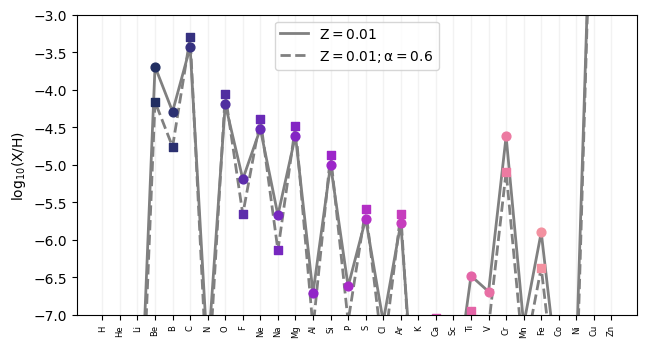

(<Figure size 700x400 with 1 Axes>, <Axes: ylabel='$\\rm log_{10}(X/H)$'>)

In [19]:
plot_multiple_abundance_patterns(
    [a2, a3],
    labels=[r"Z=0.01", r"Z=0.01; \alpha = 0.6"],
    show=True,
    ylim=[-7.0, -3.0],
)

We can plot the abundance pattern of each component:

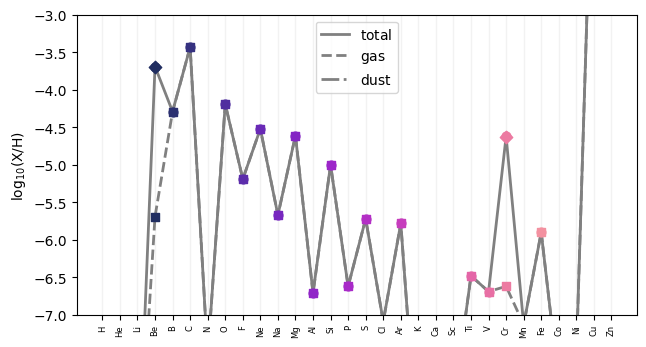

(<Figure size 700x400 with 1 Axes>, <Axes: ylabel='$\\rm log_{10}(X/H)$'>)

In [20]:
plot_abundance_pattern(
    a4, show=True, ylim=[-7.0, -3.0], components=["total", "gas", "dust"]
)